In [1]:
from src.data_loader import csv_to_npy, load_trace, load_trace_CW305, AES_VERSIONS, IS_RAND, RAW_DATASET_PATH, DATASET_PATH, DATASET_PATH_CW305
from sklearn.utils import shuffle

In [2]:
n_train   = 8000
n_val     = 1000
n_test    = 1000
n_samples = 10000
# n_train   = 16000
# n_val     = 2000
# n_test    = 2000
# n_samples = 20000

In [3]:
import numpy as np
import os

def save_supervised_data(normal, trojan, version, output_dir="./supervised_dataset", seed=2025):
    print(f"\n--- {version} ---")
    
    # 1. Train Set (Disabled 8000 + Triggered 8000)
    X_train_unshuffled = np.concatenate([normal[:n_train], trojan[:n_train]])
    y_train_unshuffled = np.concatenate([np.zeros(n_train), np.ones(n_train)])
    X_train, y_train = shuffle(X_train_unshuffled, y_train_unshuffled, random_state=seed)

    # 2. Validation Set (Disabled 1000 + Triggered 1000)
    X_val = np.concatenate([normal[n_train:n_train+n_val], trojan[n_train:n_train+n_val]])
    y_val = np.concatenate([np.zeros(n_val), np.ones(n_val)])
    
    # 3. Test Set (Disabled 1000 + Triggered 1000)
    X_test = np.concatenate([normal[n_train+n_val:], trojan[n_train+n_val:]])
    y_test = np.concatenate([np.zeros(n_test), np.ones(n_test)])

    # 4. Save Data & Label
    np.save(os.path.join(output_dir, f'KMU_{version}_train.npy'), X_train)
    np.save(os.path.join(output_dir, f'KMU_{version}_train_labels.npy'), y_train)
    
    np.save(os.path.join(output_dir, f'KMU_{version}_val.npy'), X_val)
    np.save(os.path.join(output_dir, f'KMU_{version}_val_labels.npy'), y_val)

    np.save(os.path.join(output_dir, f'KMU_{version}_test.npy'), X_test)
    np.save(os.path.join(output_dir, f'KMU_{version}_test_labels.npy'), y_test)
    
    print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
    print("Save Finished.")

In [4]:
for version in ["AES-T500", "AES-T700", "AES-T800"]:
    OUTPUT_DIR = "./supervised_dataset_CW305/KMU"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    trace = load_trace_CW305(version)
    normal_data = trace[:n_samples]
    trojan_data = trace[n_samples:]
    
    save_supervised_data(normal_data, trojan_data, version=version, output_dir=OUTPUT_DIR)

Data shape for AES-T500: (20000, 900)

--- AES-T500 ---
Train: (16000, 900), Val: (2000, 900), Test: (2000, 900)
Save Finished.
Data shape for AES-T700: (20000, 900)

--- AES-T700 ---
Train: (16000, 900), Val: (2000, 900), Test: (2000, 900)
Save Finished.
Data shape for AES-T800: (20000, 900)

--- AES-T800 ---
Train: (16000, 900), Val: (2000, 900), Test: (2000, 900)
Save Finished.


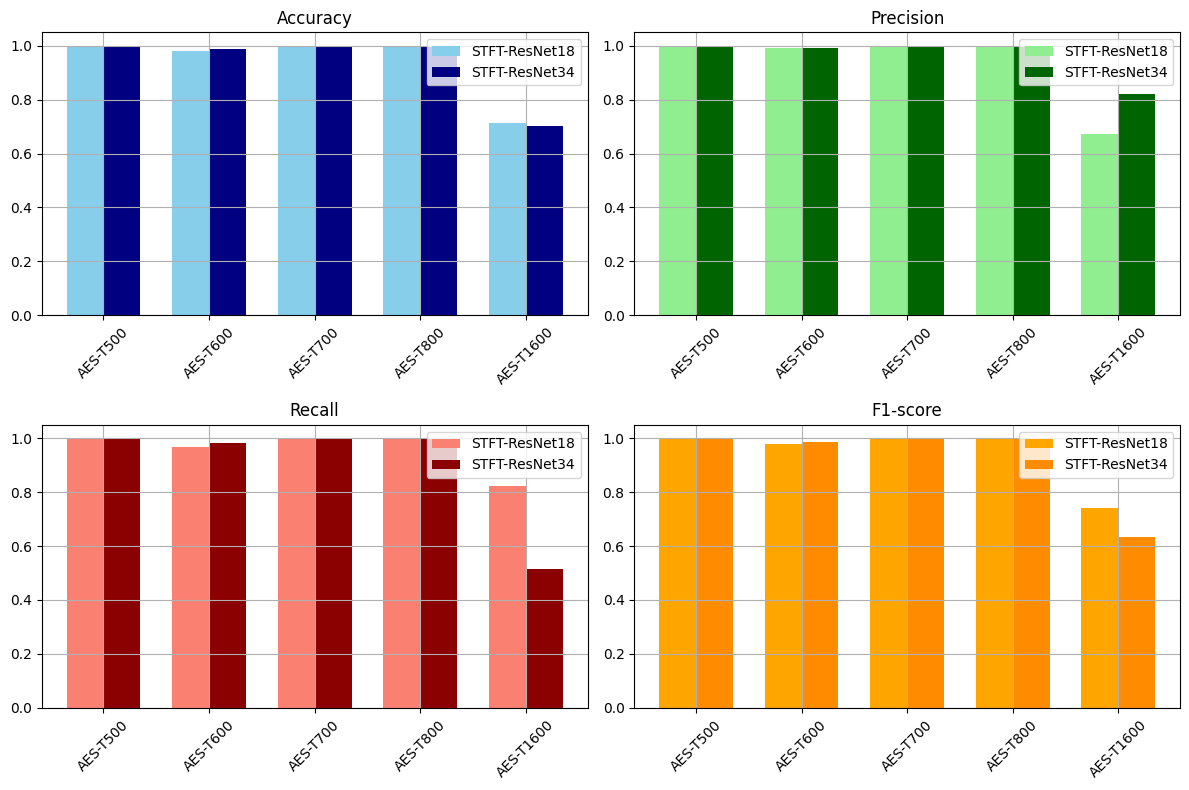

In [4]:
import matplotlib.pyplot as plt
import numpy as np

version = ["AES-T500", "AES-T600", "AES-T700", "AES-T800", "AES-T1600"]
x = np.arange(len(version))  # [0,1,2,3,4]

# 두 모델의 성능 데이터 (예시)
acc_model1  = [1.000, 0.979, 1.000, 1.000, 0.713]
acc_model2  = [1.000, 0.987, 1.000, 1.000, 0.701]

prec_model1 = [1.000, 0.991, 1.000, 1.000, 0.6743]
prec_model2 = [1.000, 0.991, 1.000, 1.000, 0.82]

rec_model1  = [1.000, 0.967, 1.0000, 1.000, 0.824]
rec_model2  = [1.000, 0.982, 1.0000, 1.000, 0.514]

f1_model1   = [1.000, 0.979, 1.000, 1.000, 0.7417]
f1_model2   = [1.000, 0.986, 1.000, 1.000, 0.632]

# 막대 폭
width = 0.35  

# 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy
axs[0, 0].bar(x - width/2, acc_model1, width, label="STFT-ResNet18", color="skyblue")
axs[0, 0].bar(x + width/2, acc_model2, width, label="STFT-ResNet34", color="navy")
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(version, rotation=45)
axs[0, 0].legend()
axs[0, 0].grid(True)

# Precision
axs[0, 1].bar(x - width/2, prec_model1, width, label="STFT-ResNet18", color="lightgreen")
axs[0, 1].bar(x + width/2, prec_model2, width, label="STFT-ResNet34", color="darkgreen")
axs[0, 1].set_title("Precision")
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(version, rotation=45)
axs[0, 1].legend()
axs[0, 1].grid(True)

# Recall
axs[1, 0].bar(x - width/2, rec_model1, width, label="STFT-ResNet18", color="salmon")
axs[1, 0].bar(x + width/2, rec_model2, width, label="STFT-ResNet34", color="darkred")
axs[1, 0].set_title("Recall")
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(version, rotation=45)
axs[1, 0].legend()
axs[1, 0].grid(True)

# F1-score
axs[1, 1].bar(x - width/2, f1_model1, width, label="STFT-ResNet18", color="orange")
axs[1, 1].bar(x + width/2, f1_model2, width, label="STFT-ResNet34", color="darkorange")
axs[1, 1].set_title("F1-score")
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(version, rotation=45)
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

version = ["AES-T500", "AES-T600", "AES-T700", "AES-T800", "AES-T1600"]
x = np.arange(len(version))  # [0,1,2,3,4]

# 두 모델의 성능 데이터 (예시)
acc_model1  = [1.0000]
prec_model1 = [1.0000]
rec_model1  = [1.0000]
f1_model1   = [1.0000]

# 막대 폭
width = 0.5

# 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy
axs[0, 0].bar(x, acc_model1, width, label="BWOA-KNN", color="skyblue")
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(version, rotation=45)
axs[0, 0].legend()
axs[0, 0].grid(True)

# Precision
axs[0, 1].bar(x, prec_model1, width, label="BWOA-KNN", color="navy")
axs[0, 1].set_title("Precision")
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(version, rotation=45)
axs[0, 1].legend()
axs[0, 1].grid(True)

# Recall
axs[1, 0].bar(x, rec_model1, width, label="BWOA-KNN", color="salmon")
axs[1, 0].set_title("Recall")
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(version, rotation=45)
axs[1, 0].legend()
axs[1, 0].grid(True)

# F1-score
axs[1, 1].bar(x, f1_model1, width, label="BWOA-KNN", color="orange")
axs[1, 1].set_title("F1-score")
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(version, rotation=45)
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

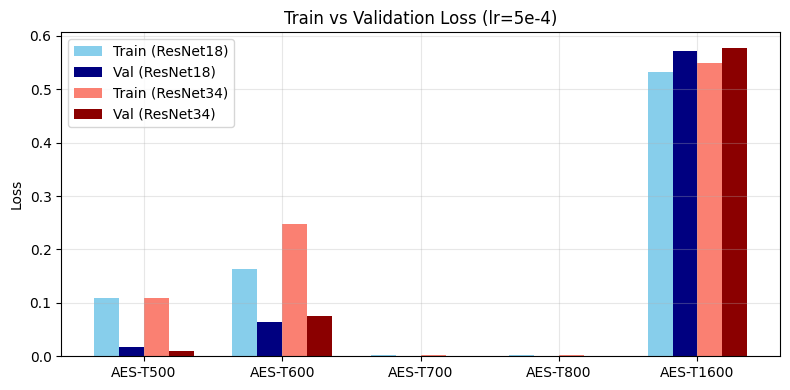

In [10]:
import matplotlib.pyplot as plt
import numpy as np

aes_versions = ['AES-T500', 'AES-T600', 'AES-T700', 'AES-T800', 'AES-T1600']

train_loss_18 = [0.1087, 0.1635, 0.0022, 0.0020, 0.5324]
val_loss_18   = [0.0176, 0.0643, 0.0000, 0.0000, 0.5723]
train_loss_34 = [0.1100, 0.2483, 0.0030, 0.0026, 0.5484]
val_loss_34   = [0.0106, 0.0748, 0.0000, 0.0000, 0.5777]

val_acc_18 = [100.0, 97.8, 100.0, 100.0, 71.25]
test_acc_18 = [100.0, 97.9, 100.0, 100.0, 71.3]
val_acc_34 = [100.0, 97.95, 100.0, 100.0, 69.7]
test_acc_34 = [100.0, 98.7, 100.0, 100.0, 70.1]

x = np.arange(len(aes_versions))
width = 0.18

plt.figure(figsize=(8,4))
plt.bar(x - width*1.5, train_loss_18, width, label='Train (ResNet18)', color='skyblue')
plt.bar(x - width*0.5, val_loss_18, width, label='Val (ResNet18)', color='navy')
plt.bar(x + width*0.5, train_loss_34, width, label='Train (ResNet34)', color='salmon')
plt.bar(x + width*1.5, val_loss_34, width, label='Val (ResNet34)', color='darkred')
plt.xticks(x, aes_versions)
plt.ylabel('Loss')
plt.title('Train vs Validation Loss (lr=5e-4)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()